In [1]:
# Libraries to handle dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB

# library to ignore warnings if occur
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Reading Datasets

In [2]:
# Train Dataset
train = pd.read_csv('../input/santander-customer-satisfaction/train.csv', index_col=['ID'])         # Making ID as an index column

# Test Dataset
test = pd.read_csv("../input/santander-customer-satisfaction/test.csv", index_col=0)                # ID as index column

# Sample Dataset
samp_sub = pd.read_csv('../input/santander-customer-satisfaction/sample_submission.csv')

In [3]:
train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,imp_op_var39_efect_ult1,imp_op_var39_efect_ult3,imp_op_var39_ult1,imp_sal_var16_ult1,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13_largo_0,ind_var13_largo,ind_var13_medio_0,ind_var13_medio,ind_var13,ind_var14_0,ind_var14,ind_var17_0,ind_var17,ind_var18_0,ind_var18,ind_var19,ind_var20_0,ind_var20,ind_var24_0,ind_var24,ind_var25_cte,ind_var26_0,ind_var26_cte,ind_var26,ind_var25_0,ind_var25,ind_var27_0,ind_var28_0,ind_var28,ind_var27,ind_var29_0,ind_var29,ind_var30_0,ind_var30,ind_var31_0,ind_var31,ind_var32_cte,ind_var32_0,ind_var32,ind_var33_0,ind_var33,ind_var34_0,ind_var34,ind_var37_cte,ind_var37_0,ind_var37,ind_var39_0,ind_var40_0,ind_var40,ind_var41_0,ind_var41,ind_var39,ind_var44_0,ind_var44,ind_var46_0,ind_var46,num_var1_0,num_var1,num_var4,num_var5_0,num_var5,num_var6_0,num_var6,num_var8_0,num_var8,num_var12_0,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13_largo_0,num_var13_largo,num_var13_medio_0,num_var13_medio,num_var13,num_var14_0,num_var14,num_var17_0,num_var17,num_var18_0,num_var18,num_var20_0,num_var20,num_var24_0,num_var24,num_var26_0,num_var26,num_var25_0,num_var25,num_op_var40_hace2,num_op_var40_hace3,num_op_var40_ult1,num_op_var40_ult3,num_op_var41_hace2,num_op_var41_hace3,num_op_var41_ult1,num_op_var41_ult3,num_op_var39_hace2,num_op_var39_hace3,num_op_var39_ult1,num_op_var39_ult3,num_var27_0,num_var28_0,num_var28,num_var27,num_var29_0,num_var29,num_var30_0,num_var30,num_var31_0,num_var31,num_var32_0,num_var32,num_var33_0,num_var33,num_var34_0,num_var34,num_var35,num_var37_med_ult2,num_var37_0,num_var37,num_var39_0,num_var40_0,num_var40,num_var41_0,num_var41,num_var39,num_var42_0,num_var42,num_var44_0,num_var44,num_var46_0,num_var46,saldo_var1,saldo_var5,saldo_var6,saldo_var8,saldo_var12,saldo_var13_corto,saldo_var13_largo,saldo_var13_medio,saldo_var13,saldo_var14,saldo_var17,saldo_var18,saldo_var20,saldo_var24,saldo_var26,saldo_var25,saldo_var28,saldo_var27,saldo_var29,saldo_var30,saldo_var31,saldo_var32,saldo_var33,saldo_var34,saldo_var37,saldo_var40,saldo_var41,saldo_var42,saldo_var44,saldo_var46,var36,delta_imp_amort_var18_1y3,delta_imp_amort_var34_1y3,delta_imp_aport_var13_1y3,delta_imp_aport_var17_1y3,delta_imp_aport_var33_1y3,delta_imp_compra_var44_1y3,delta_imp_reemb_var13_1y3,delta_imp_reemb_var17_1y3,delta_imp_reemb_var33_1y3,delta_imp_trasp_var17_in_1y3,delta_imp_trasp_var17_out_1y3,delta_imp_trasp_var33_in_1y3,delta_imp_trasp_var33_out_1y3,delta_imp_venta_var44_1y3,delta_num_aport_var13_1y3,delta_num_aport_var17_1y3,delta_num_aport_var33_1y3,delta_num_compra_var44_1y3,delta_num_reemb_var13_1y3,delta_num_reemb_var17_1y3,delta_num_reemb_var33_1y3,delta_num_trasp_var17_in_1y3,delta_num_trasp_var17_out_1y3,delta_num_trasp_var33_in_1y3,delta_num_trasp_var33_out_1y3,delta_num_venta_var44_1y3,imp_amort_var18_hace3,imp_amort_var18_ult1,imp_amort_var34_hace3,imp_amort_var34_ult1,imp_aport_var13_hace3,imp_aport_var13_ult1,imp_aport_var17_hace3,imp_aport_var17_ult1,imp_aport_var33_hace3,imp_aport_var33_ult1,imp_var7_emit_ult1,imp_var7_recib_ult1,imp_compra_var44_hace3,imp_compra_var44_ult1,imp_reemb_var13_hace3,imp_reemb_var13_ult1,imp_reemb_var17_hace3,imp_reemb_var17_ult1,imp_reemb_var33_hace3,imp_reemb_var33_ult1,imp_var43_emit_ult1,imp_trans_var37_ult1,imp_trasp_var17_in_hace3,imp_trasp_var17_in_ult1,imp_trasp_var17_out_hace3,imp_trasp_var17_out_ult1,imp_trasp_var33_in_hace3,imp_trasp_var33_in_ult1,imp_trasp_var33_out_hace3,imp_trasp_var33_out_ult1,imp_venta_var44_hace3,imp_venta_var44_ult1,ind_var7_emit_ult1,ind_var7_recib_ult1,ind_var10_ult1,ind_var10cte

In [4]:
train['TARGET'].unique()

array([0, 1])

In [5]:
train.shape

(76020, 370)

In [6]:
train.isna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76020 entries, 1 to 151838
Columns: 370 entries, var3 to TARGET
dtypes: bool(370)
memory usage: 27.4 MB


In [7]:
train.dtypes      # DataTypes

var3                               int64
var15                              int64
imp_ent_var16_ult1               float64
imp_op_var39_comer_ult1          float64
imp_op_var39_comer_ult3          float64
imp_op_var40_comer_ult1          float64
imp_op_var40_comer_ult3          float64
imp_op_var40_efect_ult1          float64
imp_op_var40_efect_ult3          float64
imp_op_var40_ult1                float64
imp_op_var41_comer_ult1          float64
imp_op_var41_comer_ult3          float64
imp_op_var41_efect_ult1          float64
imp_op_var41_efect_ult3          float64
imp_op_var41_ult1                float64
imp_op_var39_efect_ult1          float64
imp_op_var39_efect_ult3          float64
imp_op_var39_ult1                float64
imp_sal_var16_ult1               float64
ind_var1_0                         int64
ind_var1                           int64
ind_var2_0                         int64
ind_var2                           int64
ind_var5_0                         int64
ind_var5        

# Split DataSet

In [8]:
X = train.iloc[:,0:-1]      # Selecting Feature Columns
Y = train.iloc[:,-1]        # Selecting Target Column

In [9]:
X.shape, Y.shape

((76020, 369), (76020,))

# Normalization

In [10]:
scaler = StandardScaler()
Xscaled = scaler.fit_transform(X)

In [11]:
testscaled = scaler.transform(test)

In [12]:
print(Xscaled)
print(testscaled)

[[ 3.90744048e-02 -7.88248631e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -4.27182680e-01]
 [ 3.90744048e-02  6.07525955e-02 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -3.72038298e-01]
 [ 3.90744048e-02 -7.88248631e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -2.73191237e-01]
 ...
 [ 3.90744048e-02 -7.88248631e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -2.36542515e-01]
 [ 3.90744048e-02 -6.33884772e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -1.80428318e-01]
 [ 3.90744048e-02  9.86935752e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02  4.11519699e-04]]
[[ 3.90744048e-02 -9.36112639e-02 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -4.19918334e-01]
 [ 3.90744048e-02  1.37934525e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -3.92794017e-01]
 [ 3.90744048e-02 -7.88248631e-01 -5.33881045e-02 ... -1.88169080e-02
  -1.98468529e-02 -3.84542610e-01]
 ...
 [ 3.90744048e-02 -7.11066701e-01 -5.3388104

# MODEL :: PCA 

In [13]:
pca = PCA()

In [14]:
principalComponents = pca.fit_transform(Xscaled)

In [15]:
print(pca.explained_variance_)

[2.70739876e+01 1.75171867e+01 1.22072989e+01 1.16541001e+01
 1.14388510e+01 1.04467981e+01 9.85334153e+00 9.46080739e+00
 8.74321267e+00 8.58027039e+00 7.55301809e+00 7.14284016e+00
 7.06816514e+00 6.84861089e+00 6.65999658e+00 5.86527640e+00
 5.46738276e+00 5.22078973e+00 4.65978670e+00 4.43044322e+00
 4.32779288e+00 4.13665365e+00 4.09995036e+00 3.95431145e+00
 3.60537983e+00 3.55213321e+00 3.45420320e+00 3.38617323e+00
 3.34246427e+00 3.23070796e+00 3.18712635e+00 3.13264871e+00
 3.06460528e+00 2.92749954e+00 2.83657424e+00 2.69102179e+00
 2.46734881e+00 2.39673814e+00 2.26668790e+00 2.23339386e+00
 2.16712140e+00 2.09499366e+00 2.08969072e+00 2.03378834e+00
 2.01246028e+00 2.00590356e+00 1.94730998e+00 1.93375018e+00
 1.90780918e+00 1.85098259e+00 1.74573339e+00 1.70626729e+00
 1.47984117e+00 1.45376262e+00 1.40361404e+00 1.37825657e+00
 1.36385677e+00 1.30750825e+00 1.28257283e+00 1.24355741e+00
 1.22716335e+00 1.19361712e+00 1.19017875e+00 1.10878421e+00
 1.08583390e+00 1.036069

In [16]:
print(np.sum(pca.explained_variance_))

335.00440679303887


In [17]:
print(pca.explained_variance_ratio_)

[8.08168103e-02 5.22894217e-02 3.64392189e-02 3.47879008e-02
 3.41453747e-02 3.11840618e-02 2.94125729e-02 2.82408446e-02
 2.60987990e-02 2.56124105e-02 2.25460261e-02 2.13216304e-02
 2.10987229e-02 2.04433457e-02 1.98803253e-02 1.75080575e-02
 1.63203309e-02 1.55842420e-02 1.39096281e-02 1.32250297e-02
 1.29186148e-02 1.23480574e-02 1.22384968e-02 1.18037595e-02
 1.07621863e-02 1.06032432e-02 1.03109187e-02 1.01078468e-02
 9.97737403e-03 9.64377751e-03 9.51368484e-03 9.35106717e-03
 9.14795511e-03 8.73868966e-03 8.46727440e-03 8.03279520e-03
 7.36512343e-03 7.15434809e-03 6.76614352e-03 6.66675964e-03
 6.46893402e-03 6.25363014e-03 6.23780070e-03 6.07093012e-03
 6.00726510e-03 5.98769304e-03 5.81278914e-03 5.77231265e-03
 5.69487786e-03 5.52524848e-03 5.21107589e-03 5.09326820e-03
 4.41737821e-03 4.33953283e-03 4.18983755e-03 4.11414461e-03
 4.07116070e-03 3.90295837e-03 3.82852526e-03 3.71206285e-03
 3.66312598e-03 3.56298930e-03 3.55272567e-03 3.30976008e-03
 3.24125258e-03 3.092704

In [18]:
print(pca.explained_variance_ratio_ * 100)

[8.08168103e+00 5.22894217e+00 3.64392189e+00 3.47879008e+00
 3.41453747e+00 3.11840618e+00 2.94125729e+00 2.82408446e+00
 2.60987990e+00 2.56124105e+00 2.25460261e+00 2.13216304e+00
 2.10987229e+00 2.04433457e+00 1.98803253e+00 1.75080575e+00
 1.63203309e+00 1.55842420e+00 1.39096281e+00 1.32250297e+00
 1.29186148e+00 1.23480574e+00 1.22384968e+00 1.18037595e+00
 1.07621863e+00 1.06032432e+00 1.03109187e+00 1.01078468e+00
 9.97737403e-01 9.64377751e-01 9.51368484e-01 9.35106717e-01
 9.14795511e-01 8.73868966e-01 8.46727440e-01 8.03279520e-01
 7.36512343e-01 7.15434809e-01 6.76614352e-01 6.66675964e-01
 6.46893402e-01 6.25363014e-01 6.23780070e-01 6.07093012e-01
 6.00726510e-01 5.98769304e-01 5.81278914e-01 5.77231265e-01
 5.69487786e-01 5.52524848e-01 5.21107589e-01 5.09326820e-01
 4.41737821e-01 4.33953283e-01 4.18983755e-01 4.11414461e-01
 4.07116070e-01 3.90295837e-01 3.82852526e-01 3.71206285e-01
 3.66312598e-01 3.56298930e-01 3.55272567e-01 3.30976008e-01
 3.24125258e-01 3.092704

In [19]:
len(pca.explained_variance_ratio_)    # Checking Length

369

# Vizualization

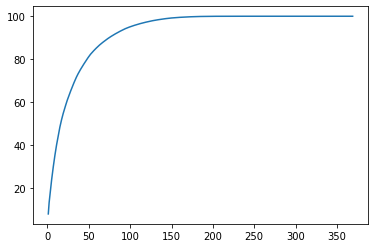

In [20]:
### Scree Plot
y = np.cumsum(pca.explained_variance_ratio_ * 100)
x = np.arange(1,370)
plt.plot(x,y)
plt.show()

In [21]:
np.sum(pca.explained_variance_ratio_)

0.9999999999999999

In [22]:
temp = pca.explained_variance_ratio_ * 100

In [23]:
np.sum(temp[:107])

95.99600628220408

In [24]:
new_pca = PCA(n_components=107, random_state = 2021)

In [25]:
new_pca.fit_transform(Xscaled)

array([[-2.67355283e+00, -1.55462089e+00, -2.22497304e-01, ...,
        -1.63521786e-02, -3.06014792e-02,  4.81420835e-02],
       [-9.59710168e-01,  7.75265340e+00, -4.19528437e+00, ...,
        -2.73272444e-01, -7.10340749e-02,  2.93051939e-02],
       [-1.98476409e+00, -9.33970470e-01,  1.19141071e-02, ...,
         1.34040302e-01,  1.13973890e-01, -1.95117969e-01],
       ...,
       [-1.99952739e+00, -9.56897070e-01, -2.36713279e-03, ...,
         1.16779805e-01,  1.20601222e-01, -1.93195809e-01],
       [-1.93090375e+00, -8.89220311e-01,  1.03384441e-02, ...,
         9.27456834e-02,  1.41737787e-02,  3.61817709e-02],
       [-2.58584581e+00, -1.39974911e+00, -2.11538366e-01, ...,
         1.15629863e-02, -2.17378050e-02,  2.79478018e-02]])

In [26]:
testscaled = new_pca.transform(testscaled)

In [27]:
testscaled

array([[-1.66654571, -0.60492899,  0.04746156, ...,  0.00851231,
        -0.12550512, -0.02384327],
       [-2.15215371, -0.88950967,  0.11639556, ..., -0.03554164,
        -0.01233397,  0.01042016],
       [-0.86602176, -0.79236755,  0.06452087, ..., -0.04268071,
         0.05123546,  0.07115013],
       ...,
       [-1.93368674, -0.89127245,  0.01208788, ...,  0.10351926,
         0.03396535, -0.00513954],
       [-1.7416107 , -0.6628147 ,  0.03640063, ..., -0.00276465,
        -0.05127735,  0.01342987],
       [-1.80543513, -0.77290479,  0.03035177, ..., -0.02397876,
        -0.05642416,  0.03148775]])

In [28]:
# Selecting 1st 10 Principal Components
PCX = pd.DataFrame(principalComponents[:,:107])

# MODEL :: Gaussian Naive Bayes

In [29]:
gaussian = GaussianNB()
gaussian.fit(PCX, Y)

GaussianNB()

In [30]:
y_pred = gaussian.predict_proba(testscaled)

In [31]:
y_pred[0]

array([9.56155742e-14, 1.00000000e+00])

In [32]:
samp_sub.head()

,ID,TARGET
0,2,0
1,5,0
2,6,0
3,7,0
4,9,0


In [33]:
submit = pd.DataFrame(y_pred, index = samp_sub.ID, columns=samp_sub.columns[:2])

In [34]:
submit = submit.drop('ID', axis=1)
submit.head()

,TARGET
ID,
2,1.0
5,1.0
6,1.0
7,1.0
9,1.0


In [35]:
submit.shape

(75818, 1)

In [36]:
submit.to_csv("GaussianNB_pca.csv")